## ThinkDSP

This notebook contains code examples from Chapter 1: Sounds and Signals

Copied from ThinkDSP Book.  
All rights reserved to Allen Downey.

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)


### Signals

Here are the modules we'll need.

* `thinkdsp` is a module that accompanies _Think DSP_ and provides classes and functions for working with signals.

* `thinkplot` is a wrapper around matplotlib.

[Documentation of the thinkdsp module is here](http://greenteapress.com/thinkdsp.html). 

In [3]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

Acoustic impulse response
--

Here's a recording of a gunshot, which approximates the acoustic impulse response of the room:

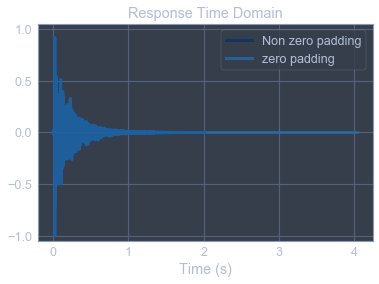

In [4]:
response = thinkdsp.read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()

response_zero = response.copy()
response_zero.zero_pad(2*len(response) - 1)

response.plot(label='Non zero padding')
response_zero.plot(label='zero padding')
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05], title='Response Time Domain')

Here's what it sounds like:

In [5]:
%run ~/.ipython/profile_default/startup/startup.ipy

In [6]:
response.make_audio()

The DFT of the impulse response is the transfer function:

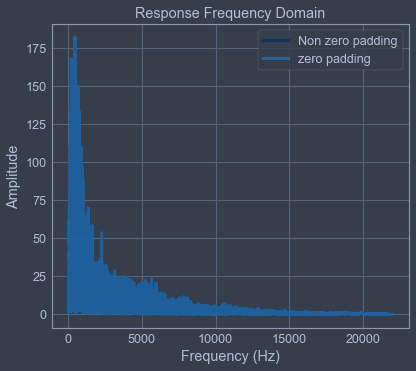

In [7]:
transfer = response.make_spectrum()
transfer.plot(label='Non zero padding')

transfer_zero = response_zero.make_spectrum()
transfer_zero.plot(label='zero padding')

thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude', title='Response Frequency Domain')

Now we can simulate what a recording would sound like if it were played in the same room and recorded in the same way.  Here's the violin recording example:

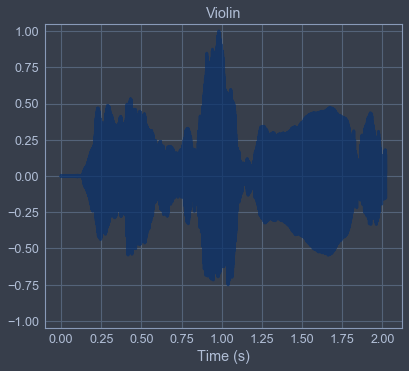

In [8]:
violin = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
# start = 0.11
# violin = violin.segment(start=start)
# violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05], title='Violin')

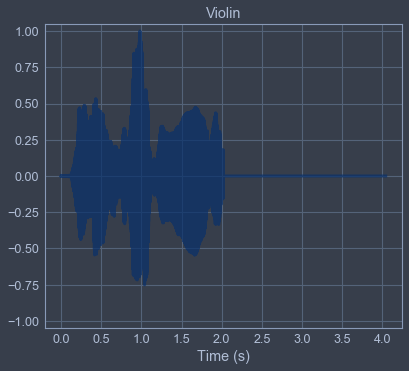

In [9]:
violin_zero = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
# start = 0.11
# violin = violin.segment(start=start)
# violin.shift(-start)

violin_zero.truncate(len(response))
violin_zero.zero_pad(2*len(response) - 1)
violin_zero.normalize()
violin_zero.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05], title='Violin')

Here's what it sounds like before transformation:

In [10]:
violin.make_audio()

In [11]:
violin_zero.make_audio()

Now we compute the DFT of the violin recording.

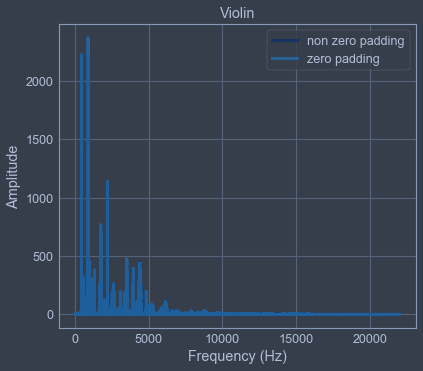

In [12]:
violin_spectrum = violin.make_spectrum()
violin_spectrum.plot(label='non zero padding')

violin_spectrum_zero = violin_zero.make_spectrum()
violin_spectrum_zero.plot(label='zero padding')

thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude', title='Violin')

Violin recording should be the same length as the impulse response that's why we trimmed it:

In [13]:
len(violin_spectrum.hs), len(transfer.hs), len(violin.ys), len(response.ys)

(44554, 44554, 89106, 89106)

In [14]:
len(violin_spectrum_zero.hs), len(transfer_zero.hs), len(violin_zero.ys), len(response_zero.ys)

(89106, 89106, 178211, 178211)

We we can multiply in the frequency domain and transform back to the time domain.
Dot and iFFT.

In [15]:
output = (violin_spectrum * transfer).make_wave()
output.normalize()

output_zero = (violin_spectrum_zero * transfer_zero).make_wave()
output_zero.normalize()

Here's a  comparison of the original and transformed recordings without and with zero paddings:

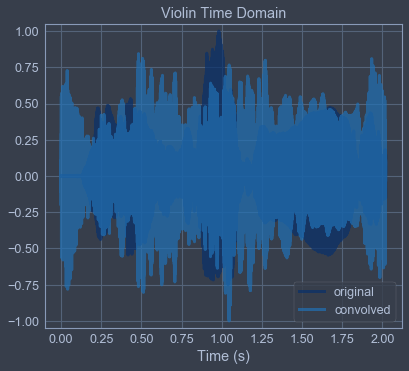

In [16]:
violin.plot(label='original')
output.plot(label='convolved')
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05], title='Violin Time Domain')

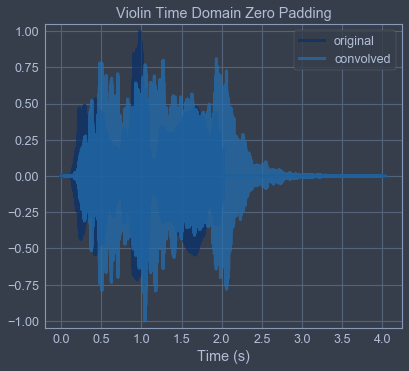

In [17]:
violin_zero.plot(label='original')
output_zero.plot(label='convolved')
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05], title='Violin Time Domain Zero Padding')

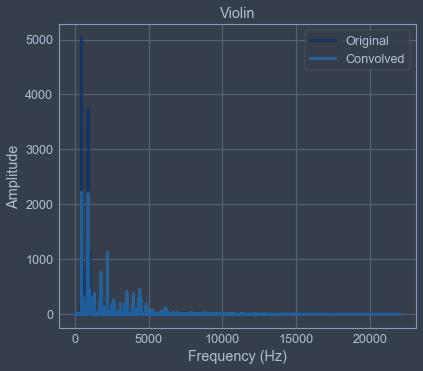

In [18]:
spectrum = output.make_spectrum()
spectrum.plot(label='Original')
violin_spectrum.plot(label='Convolved')
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude', title='Violin')

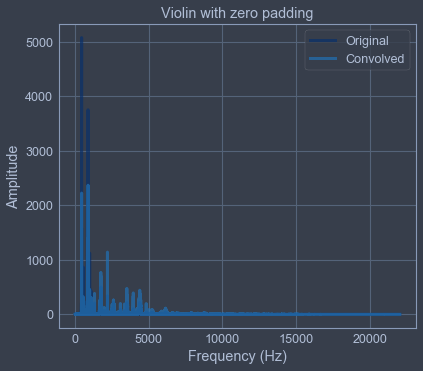

In [19]:
spectrum_zero = output_zero.make_spectrum()
spectrum_zero.plot(label='Original')
violin_spectrum_zero.plot(label='Convolved')
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude', title='Violin with zero padding')

And here's what it sounds like:

In [20]:
output.make_audio()

In [21]:
output_zero.make_audio()